<a href="https://colab.research.google.com/github/avijayant/SentimentClassificationExploration/blob/master/NLP_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip


--2020-03-23 20:56:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84188 (82K) [application/x-httpd-php]
Saving to: ‘sentiment labelled sentences.zip’

sentiment labelled  100%[===================>]  82.21K  --.-KB/s    in 0.1s    

2020-03-23 20:56:40 (648 KB/s) - ‘sentiment labelled sentences.zip’ saved [84188/84188]



In [0]:
from zipfile import ZipFile
file_name = "sentiment labelled sentences.zip"
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
sentiment labelled sentences/                  2016-07-05 11:32:30            0
sentiment labelled sentences/.DS_Store         2016-07-05 11:32:34         6148
__MACOSX/                                      2016-07-05 11:39:00            0
__MACOSX/sentiment labelled sentences/         2016-07-05 11:39:00            0
__MACOSX/sentiment labelled sentences/._.DS_Store 2016-07-05 11:32:34          212
sentiment labelled sentences/amazon_cells_labelled.txt 2016-07-05 11:30:22        58226
sentiment labelled sentences/imdb_labelled.txt 2015-02-14 16:11:16        85285
__MACOSX/sentiment labelled sentences/._imdb_labelled.txt 2015-02-14 16:11:16          212
sentiment labelled sentences/readme.txt        2015-05-30 17:29:46         1070
__MACOSX/sentiment labelled sentences/._readme.txt 2015-05-30 17:29:46          212
sentiment labelled sentences/yelp_labelled.txt 2016-07-05 11:27:32        61320
__MACOSX/._sen

In [0]:
import pandas as pd
import os

In [0]:
print(os.listdir('sentiment_datasets'))
#Read the datasets
yelp_data_full = pd.read_csv('sentiment_datasets/yelp_labelled.txt',sep='\t', header=None,names=['Sentence','Label'])
amazon_data_full = pd.read_csv('sentiment_datasets/amazon_cells_labelled.txt',sep='\t', header=None,names=['Sentence','Label'])
imdb_data_full = pd.read_csv('sentiment_datasets/imdb_labelled.txt',sep='\t', header=None,names=['Sentence','Label'])
yelp_data_full.loc[:,'Source']='Yelp'
amazon_data_full.loc[:,'Source']='Amazon'
imdb_data_full.loc[:,'Source']='IMDB'

['.DS_Store', 'imdb_labelled.txt', 'amazon_cells_labelled.txt', 'readme.txt', 'yelp_labelled.txt']


In [0]:
all_data = pd.concat([yelp_data_full, amazon_data_full, imdb_data_full])

In [0]:
#first let's do a baseline model for only the yelp data
from sklearn.model_selection import train_test_split

x = yelp_data_full['Sentence']
y = yelp_data_full['Label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1000)

validation_count = int(0.25 * len(x_train))
x_validation = x_train[-validation_count:]
y_validation = y_train[-validation_count:]
x_train = x_train[:len(x_train)-validation_count]
y_train = y_train[:len(y_train)-validation_count]


In [0]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

STOPWORDS = set(stopwords.words('english'))
#Try lemmatization
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()# lowercase text
    text = re.sub(REPLACE_BY_SPACE_RE," ",text)# replace REPLACE_BY_SPACE_RE symbols by space in text
    text = re.sub(BAD_SYMBOLS_RE,"",text)# delete symbols which are in BAD_SYMBOLS_RE from text
    #not removing stop words -- will remove not etc
    #text = ' '.join([word for word in text.split() if word not in STOPWORDS])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
#sum([len(line.split(" ")) for line in x_validation])
print(len(x_train),len(x_validation), len(x_test))
print(len(y_train), len(y_validation), len(y_test))

563 187 250
563 187 250


In [0]:
x_train = [text_prepare(line) for line in x_train]
x_test = [text_prepare(line) for line in x_test]
x_validation = [text_prepare(line) for line in x_validation]
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df = 0.9, min_df = 2)
bow_vectorizer.fit(x_train)
x_train_t = bow_vectorizer.transform(x_train)
x_validation_t = bow_vectorizer.transform(x_validation)
x_test_t = bow_vectorizer.transform(x_test)

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_t, y_train)
score = classifier.score(x_validation_t, y_validation)
print("Validation set accuracy : ",score)

Validation set accuracy :  0.786096256684492


In [0]:
index_to_words = dict([(v,k) for k, v in bow_vectorizer.vocabulary_.items()])

In [0]:
#Let's look at the most important words for positives
print('Most positive words:')
print([index_to_words[idx] for idx in classifier.coef_.argsort().tolist()[0][-5:]])
#Let's look at the most important words for negatives
print('Most negative words')
print([index_to_words[idx] for idx in classifier.coef_.argsort().tolist()[0][:5]])

Most positive words:
['amazing', 'awesome', 'good', 'delicious', 'great']
Most negative words
['not', 'bad', 'wasnt', 'much', 'dont']


['great', 'delicious', 'good', 'awesome', 'amazing', 'dont', 'much', 'wasnt', 'bad', 'not'] [2.3198942924046486, 1.7208905521475193, 1.5240109997875961, 1.3544940588780845, 1.2704917005999963, -1.1524666104124401, -1.1708451203628825, -1.2709336442117154, -1.3987644036275597, -2.005140745681257]


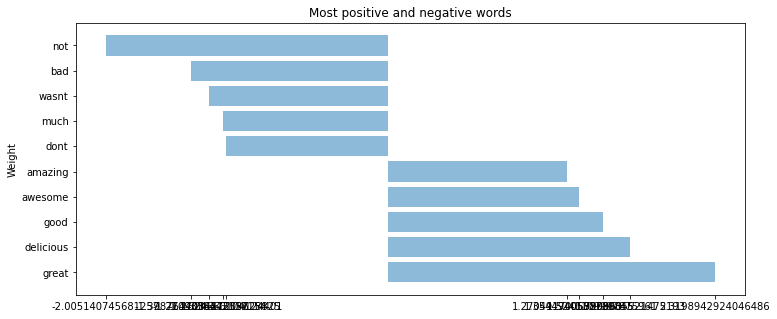

In [0]:
import matplotlib.pyplot as plt
wordindices = classifier.coef_.argsort().tolist()[0][-5:][::-1]
wordindices.extend(classifier.coef_.argsort().tolist()[0][:5][::-1])
words = [index_to_words[idx] for idx in wordindices]
coefficients = [classifier.coef_[0][idx] for idx in wordindices]
print(words, coefficients)
plt.figure(figsize=(12, 5))
plt.barh(words, coefficients, align='center', alpha=0.5)
plt.xticks(coefficients, coefficients)
plt.ylabel('Weight')
plt.title('Most positive and negative words')

plt.show()

In [0]:
#Let's look at this model's performance on our test set
score = classifier.score(x_test_t, y_test)
print("Test set accuracy : ",score)

Test set accuracy :  0.784


In [0]:
#Lets make a svm based classifiers on the same features
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
svClassifier = SVC(C=0.7)
scaler = StandardScaler(with_mean=False)
scaler.fit(x_train_t)
x_train_ts = scaler.transform(x_train_t)
x_validation_ts = scaler.transform(x_validation_t)
x_test_ts = scaler.transform(x_test_t)

svClassifier.fit(x_train_ts, y_train)
score = classifier.score(x_validation_ts, y_validation)
print("Validation set accuracy : ",score)

Validation set accuracy :  0.7700534759358288


In [0]:
#Let's look at this model's performance on our test set
score = svClassifier.score(x_test_ts, y_test)
print("Test set accuracy : ",score)

Test set accuracy :  0.684


In [0]:
#let's make a tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df = 0.9, min_df = 2)
tfidf_vectorizer.fit(x_train)
x_train_t = tfidf_vectorizer.transform(x_train)
x_validation_t = tfidf_vectorizer.transform(x_validation)
x_test_t = tfidf_vectorizer.transform(x_test)
classifier = LogisticRegression()
classifier.fit(x_train_t, y_train)
score = classifier.score(x_validation_t, y_validation)
print("Validation set accuracy : ",score)

Validation set accuracy :  0.8074866310160428


In [0]:
#Let's look at this model's performance on our test set
score = classifier.score(x_test_t, y_test)
print("Test set accuracy : ",score)

Test set accuracy :  0.768


So now we have some pretty good benchmarks for the yelp data
Let's see if we can beat them with our CNN model from the paper by YoonKim 
Old paper so nto expecting a lot of improvement
But gotta try

First let us try to simply replace the classifier with a mlp. 

We will try a num_features to 10 to 1 MLP

In [0]:
import numpy as np
len(x_train_t[0].toarray()[0])
print(583*10 + 10 + 10 + 1)

5851


In [0]:
from keras.models import Sequential
from keras import layers
num_features = np.shape(x_train_t)[1]
model = Sequential()
#first layer, input is the features, output is 10
model.add(layers.Dense(10, input_dim=num_features, activation='relu'))
#second layer output is 1. Sigmoid because this is a binary classification task(multiclass classification can use softmax)
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                5840      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 5,851
Trainable params: 5,851
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train_t, y_train,epochs=25,verbose=False,validation_data=(x_validation_t, y_validation),batch_size=50)

In [0]:
loss, accuracy = model.evaluate(x_train_t, y_train, verbose=False)
print("Training set accuracy : ", accuracy)
loss, accuracy = model.evaluate(x_validation_t, y_validation, verbose=False)
print("Validation set accuracy : ", accuracy)

Training set accuracy :  0.9502664305812301
Validation set accuracy :  0.7647058864965796


In [0]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

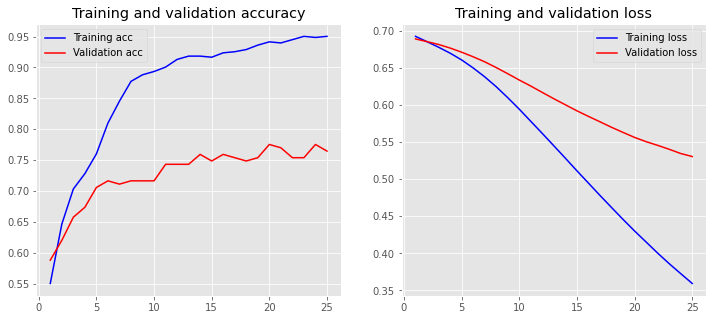

In [0]:
plot_history(history)

In [0]:
loss, accuracy = model.evaluate(x_test_t, y_test, verbose=False)
print("Test set accuracy : ", accuracy)

Test set accuracy :  0.7600000009536744


Okay, so we have something close to but not as good as the classic classifiers. Now we will get the word2vec embeddings. 

Plan

1. Sum the word2vec embeddings for a sentence and feed to LR
2. TFIDF weight sum embeddings and feed to LR
3. Word2Vec embeddings followed by YoonKim CNN solution

In [0]:
#We will use pretrained word2vec
import gensim
w2vEmbeddings = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary=True)


dir(w2vEmbeddings)

In [0]:
#!wget https://github.com/mmihaltz/word2vec-GoogleNews-vectors/blob/master/GoogleNews-vectors-negative300.bin.gz

--2020-03-23 06:01:23--  https://github.com/mmihaltz/word2vec-GoogleNews-vectors/blob/master/GoogleNews-vectors-negative300.bin.gz
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors-     [ <=>                ]  67.60K  --.-KB/s    in 0.02s   

2020-03-23 06:01:23 (4.00 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [69220]



In [0]:
import gzip
import shutil

def gunzip_shutil(source_filepath, dest_filepath, block_size=65536):
    with gzip.open(source_filepath, 'rb') as s_file, \
            open(dest_filepath, 'wb') as d_file:
        shutil.copyfileobj(s_file, d_file, block_size)

In [0]:
def transform_into_densevectors_sumall(line, w2vModel):
  words = line.split(" ")
  denseVector = np.zeros(300)
  for word in words:
    if word in w2vModel.vocab:
      denseVector = denseVector+w2vModel[word]
  return denseVector

x_train_twv = [transform_into_densevectors_sumall(line, w2vEmbeddings) for line in x_train]
x_validation_twv = [transform_into_densevectors_sumall(line, w2vEmbeddings) for line in x_validation]
x_test_twv = [transform_into_densevectors_sumall(line, w2vEmbeddings) for line in x_test]



In [0]:
classifier = LogisticRegression()
classifier.fit(x_train_twv, y_train)
score = classifier.score(x_validation_twv, y_validation)
print("Validation set accuracy : ",score)

Validation set accuracy :  0.8449197860962567


In [0]:
score = classifier.score(x_test_twv, y_test)
print("Test set accuracy : ",score)
print(x_test[59],classifier.predict([x_test_twv[59]]))

Test set accuracy :  0.76
please stay away from the shrimp stir fried noodles [0]


Now we need to get into the CNN networks to capture bigram/tri gram like ideas

In [36]:
#First we need to seed an embedding layer with word2vec embeddings
#We want to use the extrinsic knowledge already present in word2vec 
#first we need to convert all our input examples (ie reviews) to the same length 
#The embedding layer needs each example to be in integer encoding as well as of the same length
#we can do this using keras tokenizer
#if number of words is large or if we are considering bigrams etc we can use the hashing trick
#Also we need the length of each of the reviews to be the same so we will use keras built in pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
t=Tokenizer()
t.fit_on_texts(x_train)
vocab_size = len(t.word_index) + 1
x_train_encoded = t.texts_to_sequences(x_train)
x_validation_encoded = t.texts_to_sequences(x_validation)
x_test_encoded = t.texts_to_sequences(x_test)
max_length = max([len(sentence) for sentence in x_train_encoded])
x_train_padded = pad_sequences(x_train_encoded, maxlen=max_length, padding='post')
x_validation_padded = pad_sequences(x_validation_encoded, maxlen=max_length, padding='post')
x_test_padded = pad_sequences(x_test_encoded, maxlen=max_length, padding='post')
#starting embeddings
embeddings={}
for word in t.word_index.keys():
  if word in w2vEmbeddings:
    embeddings[word] = w2vEmbeddings[word]



SyntaxError: ignored

In [0]:
#Now let's make the model
#we cannot make it sequential style as it is multichannel (we make 3 parallel convolute+maxpool and then concatenate them to make our final features)
nfilters = 100
filter_sizes = (2, 3, 4)#bigram, trigram, 4-gram
model_input = Input(shape=(max_length,))
# model = Sequential()
z = layers.Embedding(vocab_size, 300, input_length=max_length,weights=[embeddings], trainable=True, name='EmbedLayer')(model_input)
z = layers.Dropout(0.1)(z)
conv_list = []
for size in filter_sizes:
  conv = layers.Conv1D(nfilters,
                  size,
                  padding='valid',
                  activation='relu',
                  strides=1)
  conv = layers.GlobalMaxPooling1D()(conv)
  #each convolution becomes 1 point due to global max pooling
  conv = layers.Flatten()(conv)
  # so we flatten into 1 row, 100 column vector
  conv_list.append(conv)

z = Concatenate()(conv_list) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(0.1)(z)
#Now we have a 300 feature vector for each sentence
#Lets put it into a hidden layer and then into an output layer
z = Dense(100, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


  



In [0]:
history = model.fit(x_train_padded, y_train,epochs=25,verbose=False,validation_data=(x_validation_padded, y_validation),batch_size=50)